In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from PIL import Image
import os
import pickle

In [2]:
train_dir = './xray/train'
test_dir = './xray/test'

In [5]:
X_train, y_train = [], []
for class_name in ['NORMAL', 'PNEUMONIA']:
    class_dir = os.path.join(train_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img = Image.open(os.path.join(class_dir, filename)).convert('L')
            img = img.resize((32, 32), resample=Image.BICUBIC)
            X_train.append(np.array(img))
            y_train.append(class_name)

X_test, y_test = [], []
for class_name in ['NORMAL', 'PNEUMONIA']:
    class_dir = os.path.join(test_dir, class_name)
    for filename in os.listdir(class_dir):
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img = Image.open(os.path.join(class_dir, filename)).convert('L')
            img = img.resize((32, 32), resample=Image.BICUBIC)
            X_test.append(np.array(img))
            y_test.append(class_name)

X_train = np.stack(X_train)
y_train = np.array(y_train)
X_test = np.stack(X_test)
y_test = np.array(y_test)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
nsamples, nx, ny = X_train.shape
X_train_flat = X_train.reshape((nsamples, nx * ny))

nsamples, nx, ny = X_test.shape
X_test_flat = X_test.reshape((nsamples, nx * ny))

In [8]:
svm_clf = SVC(kernel='rbf', C=1, gamma='auto')
svm_clf.fit(X_train_flat, y_train)

SVC(C=1, gamma='auto')

In [9]:
y_pred_svm = svm_clf.predict(X_test_flat)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')

SVM Accuracy: 0.82


In [10]:
pickle.dump(svm_clf, open('./pneumonia_svm_model.pkl', 'wb'))

In [11]:
np.save('./pneumonia_X_train.npy', X_train)
np.save('./pneumonia_y_train.npy', y_train)
np.save('./pneumonia_X_test.npy', X_test)
np.save('./pneumonia_y_test.npy', y_test)

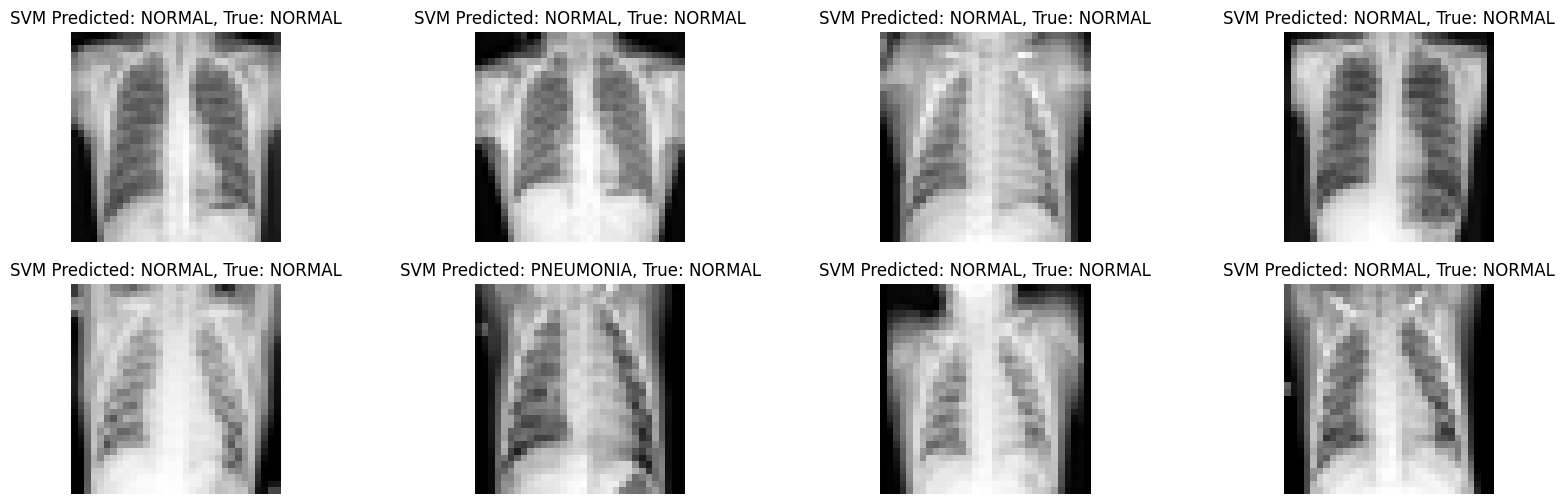

In [12]:
fig, axes = plt.subplots(2, 4, figsize=(20, 6))
for i, ax in enumerate(axes.flat):
    image = X_test[i].reshape(32, 32)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'SVM Predicted: {y_pred_svm[i]}, True: {y_test[i]}')
    ax.axis('off')
plt.show()